<a href="https://colab.research.google.com/github/akshayasuresh8/Credit-Card-Fraud-Detection/blob/main/CBLOF_Credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.1-py3-none-any.whl size=193267 sha256=c59d9694721f85e4370088a4f98bbbbd520fe18938d9a770a1264c0ee3dfe32a
  Stored in directory: /root/.cache/pip/wheels/94/75/88/b853cf33b0053b0a001dca55b74d515048b7656e736364eb57
Successfully built pyod


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pyod.models.cblof import CBLOF
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load credit card fraud detection dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets/creditcard.csv')

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.shape

(284807, 31)

In [ ]:
# Gives you number of anomalies
len(data[data['Class']==1])

492

In [ ]:
# Select features (V1 to V28)
# TODO: would be better if you take the 29 th attribute also 'Amount'
X = data.iloc[:, 1:29]

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [ ]:
# Scale data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Perform K-Means clustering to identify clusters
# TODO: Are you doing something with the variable labels later in the code. If not Why this block of code?
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Create a CBLOF model with 5 clusters
cblof = CBLOF(contamination=0.1, random_state= 42, n_clusters=5)

In [ ]:
# Fit CBLOF model to the data
cblof.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=5, n_jobs=None, random_state=42,
   use_weights=False)

In [ ]:
# Predict anomalies
# TODO: So I don't know what cblof.predict returns are you sure the value 0 and 1 are the normal and anomaly respectively if not check what it gives back
y_pred = cblof.predict(X_scaled)

In [ ]:
# Create a new column 'anomaly' in the original data
data['anomaly'] = y_pred

In [ ]:
# Inspect transactions flagged as anomalies
anomalies = data.loc[data['anomaly'] == 1]


In [ ]:
# Calculate accuracy and precision
accuracy = accuracy_score(data['Class'], y_pred)
precision = precision_score(data['Class'], y_pred)

In [ ]:
# Calculate confusion matrix
conf_mat = confusion_matrix(data['Class'], y_pred)

In [ ]:
# Print accuracy, precision, and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Confusion Matrix:")
print(conf_mat)

Accuracy: 0.9013893619187731
Precision: 0.015589340261929005
Confusion Matrix:
[[256278  28037]
 [    48    444]]


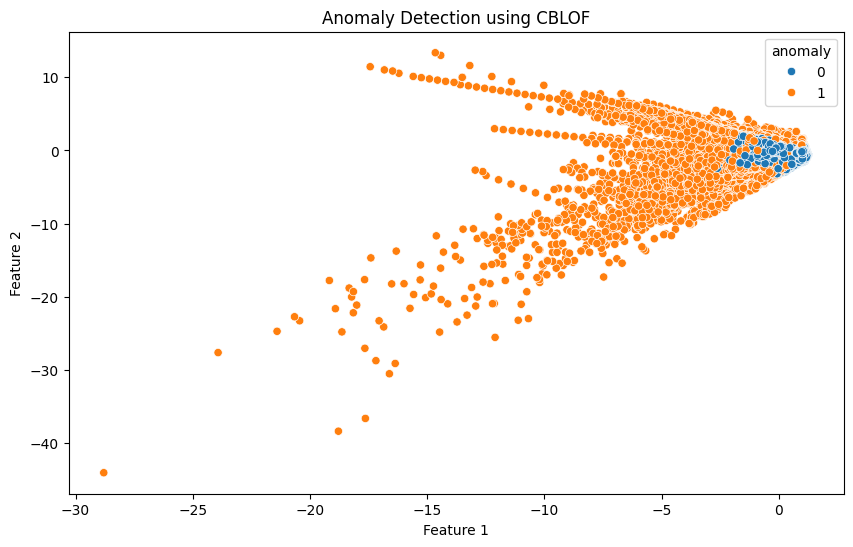

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=data['anomaly'])
plt.title("Anomaly Detection using CBLOF")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
print("Number of Anomalies:", len(anomalies))
print("Anomaly Percentage:", len(anomalies) / len(data) * 100, "%")

Number of Anomalies: 28481
Anomaly Percentage: 10.000105334489671 %


# New section

In [ ]:
## TODO: some 1 or 2 matrix like  accuracy or precession